In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/Breast_cancer_data.csv


In [5]:
data=pd.read_csv('/kaggle/input/breast-cancer-dataset/Breast_cancer_data.csv')

In [6]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/Breast_cancer_data.csv')

In [7]:
df.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


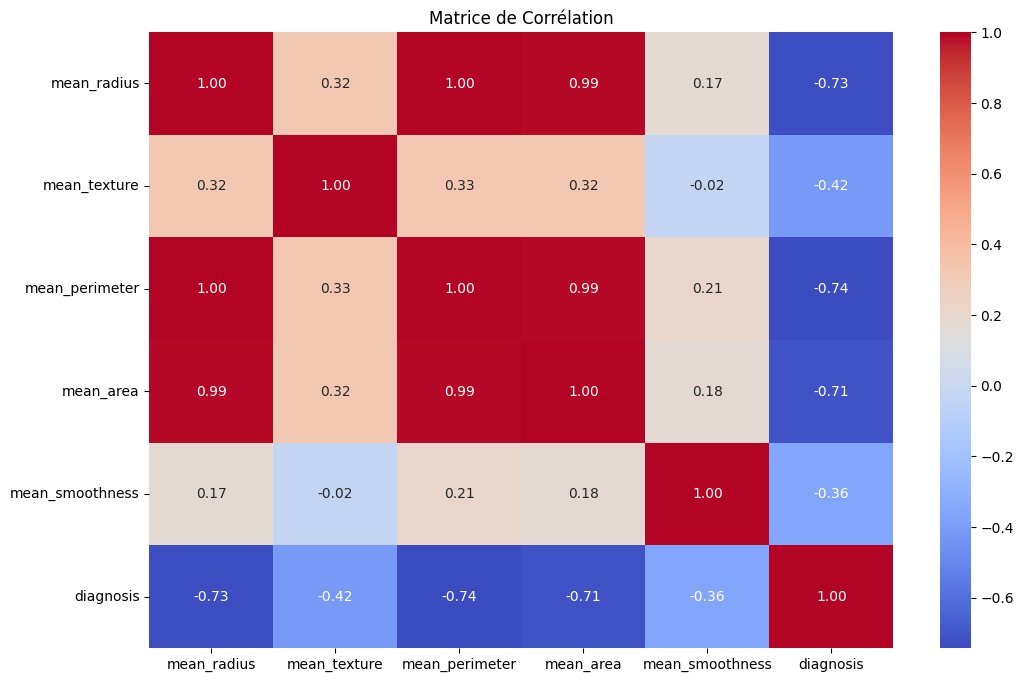

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


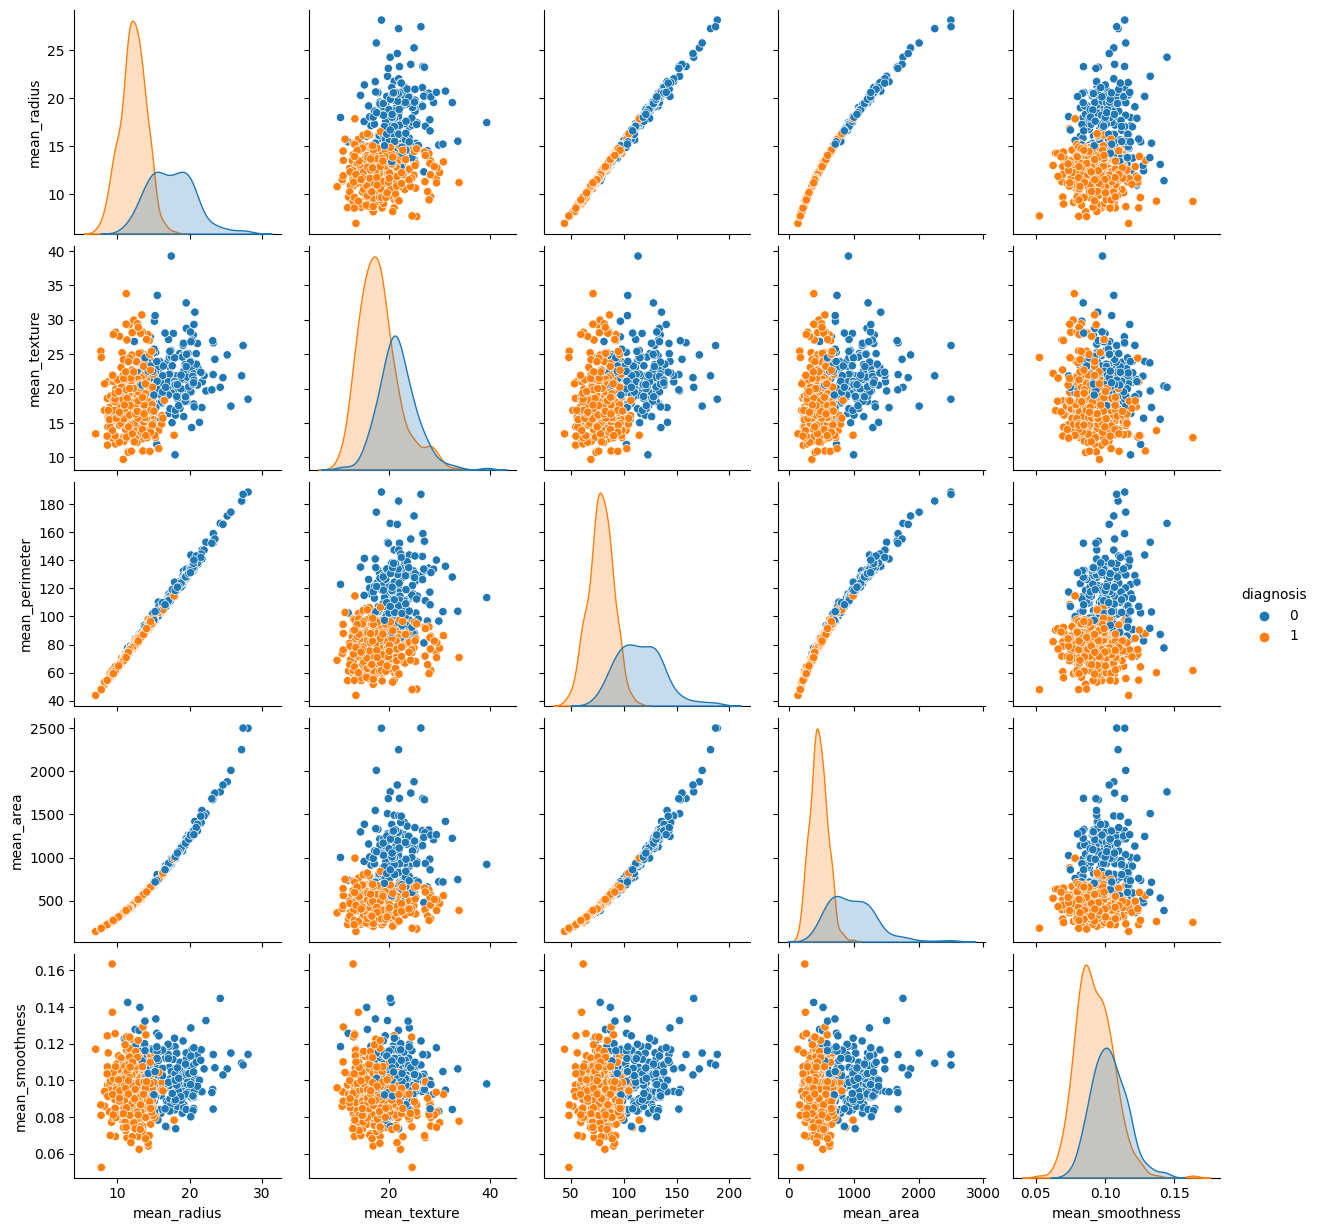

In [20]:
sns.pairplot(df, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])
plt.show()

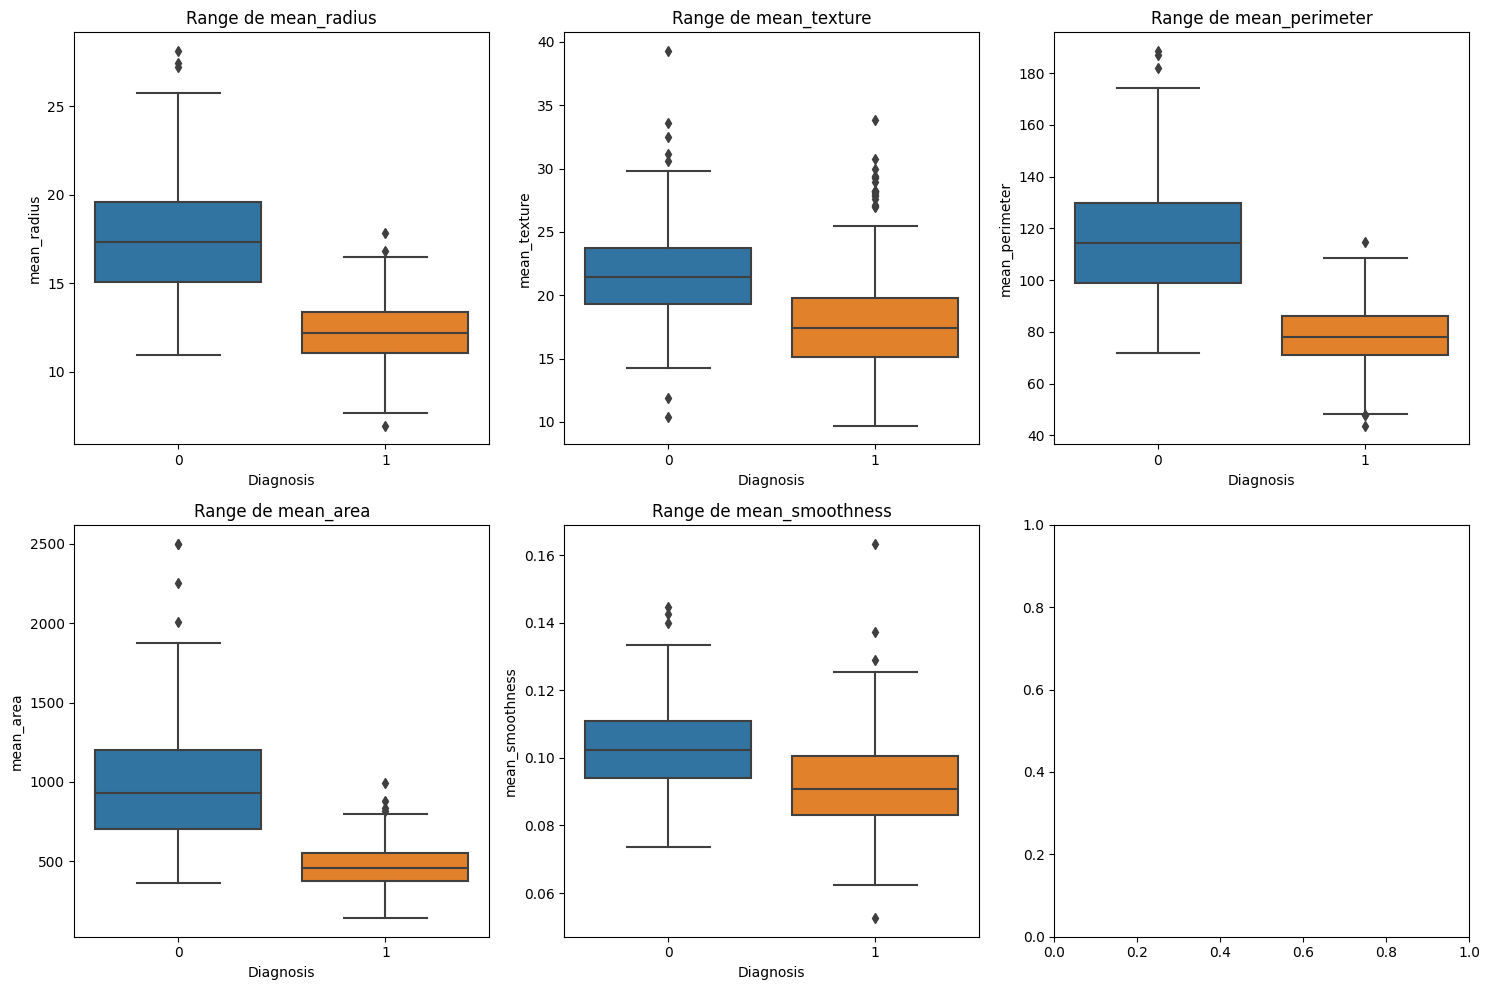

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création figure avec des sous-graphiques pour chaque caractéristique
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Caractéristiques à visualiser
features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

# Parcourir les caractéristiques et créez des diagrammes de boîtes
for i, feature in enumerate(features):
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Range de {feature}')
    axes[i // 3, i % 3].set_xlabel('Diagnosis')
    axes[i // 3, i % 3].set_ylabel(feature)

plt.tight_layout()
plt.show()


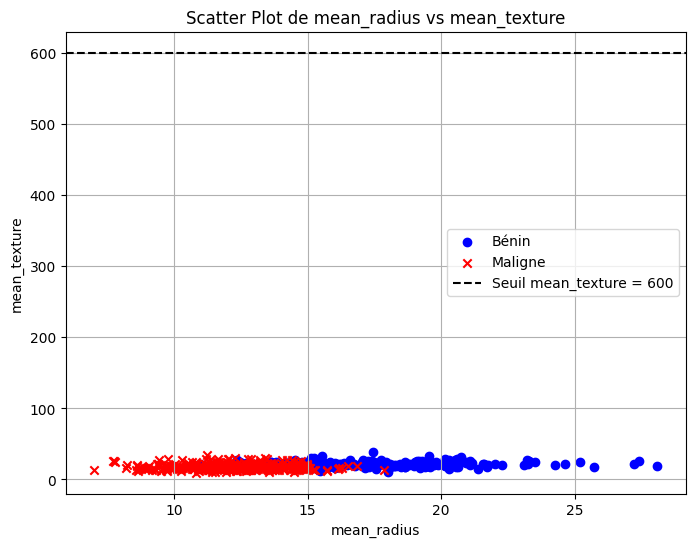

In [23]:
import matplotlib.pyplot as plt

# Choisissez les caractéristiques à comparer
feature1 = 'mean_radius'
feature2 = 'mean_texture'

# Créez un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[feature1][data['diagnosis'] == 0], data[feature2][data['diagnosis'] == 0], label='Bénin', c='blue', marker='o')
plt.scatter(data[feature1][data['diagnosis'] == 1], data[feature2][data['diagnosis'] == 1], label='Maligne', c='red', marker='x')

# Définissez un seuil pour feature2
threshold = 600
plt.axhline(y=threshold, color='black', linestyle='--', label=f'Seuil {feature2} = {threshold}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot de {feature1} vs {feature2}')
plt.legend()
plt.grid()
plt.show()


In [38]:
cas_benins = data[data['diagnosis'] == 0] 
cas_malignes = data[data['diagnosis'] == 1]

print("Statistiques récapitulatives pour mean_radius (Bénin) :")
print(cas_benins['mean_radius'].describe())

print("\nStatistiques récapitulatives pour mean_radius (Maligne) :")
print(cas_malignes['mean_radius'].describe())

print("\nStatistiques récapitulatives pour mean_texture (Bénin) :")
print(cas_benins['mean_texture'].describe())
print("\nStatistiques récapitulatives pour mean_texture (Maligne) :")
print(cas_malignes['mean_texture'].describe())

print("\nStatistiques récapitulatives pour mean_perimeter (Maligne) :")
print(cas_malignes['mean_perimeter'].describe())
print("\nStatistiques récapitulatives pour mean_perimeter (Bénin) :")
print(cas_benins['mean_perimeter'].describe())

print("\nStatistiques récapitulatives pour mean_area (Maligne) :")
print(cas_malignes['mean_area'].describe())
print("\nStatistiques récapitulatives pour mean_area (Bénin) :")
print(cas_benins['mean_area'].describe())

print("\nStatistiques récapitulatives pour mean_smoothness (Maligne) :")
print(cas_malignes['mean_smoothness'].describe())
print("\nStatistiques récapitulatives pour mean_smoothness (Bénin) :")
print(cas_benins['mean_smoothness'].describe())

Statistiques récapitulatives pour mean_radius (Bénin) :
count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: mean_radius, dtype: float64

Statistiques récapitulatives pour mean_radius (Maligne) :
count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: mean_radius, dtype: float64

Statistiques récapitulatives pour mean_texture (Bénin) :
count    212.000000
mean      21.604906
std        3.779470
min       10.380000
25%       19.327500
50%       21.460000
75%       23.765000
max       39.280000
Name: mean_texture, dtype: float64

Statistiques récapitulatives pour mean_texture (Maligne) :
count    357.000000
mean      17.914762
std        3.995125
min        9.710000
25%       15.150000
50%       17.390000
75%       19.760000
max       33.810000
Name: mean_texture, dtyp

In [12]:
cas = data[['mean_radius','mean_texture','diagnosis']]
vv=cas[cas['diagnosis'] == 0]
vv.head(40)



,mean_radius,mean_texture,diagnosis
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
5,12.45,15.70,0
6,18.25,19.98,0
7,13.71,20.83,0
8,13.00,21.82,0
9,12.46,24.04,0


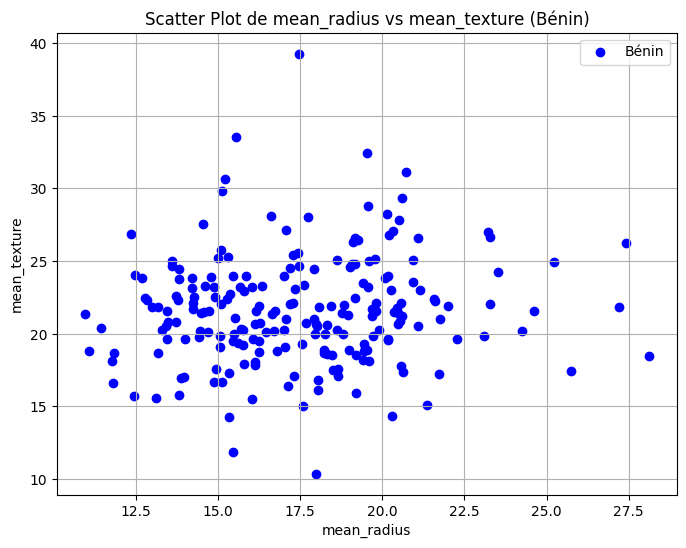

In [13]:
import matplotlib.pyplot as plt

# Filtrer les données où diagnosis est égal à 0 (bénin)
cas_benins = data[data['diagnosis'] == 0]

# Créez un scatter plot de mean_radius vs mean_texture pour les cas bénins
plt.figure(figsize=(8, 6))
plt.scatter(cas_benins['mean_radius'], cas_benins['mean_texture'], color='blue', label='Bénin', marker='o')
plt.xlabel('mean_radius')
plt.ylabel('mean_texture')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin)')
plt.legend()
plt.grid()
plt.show()


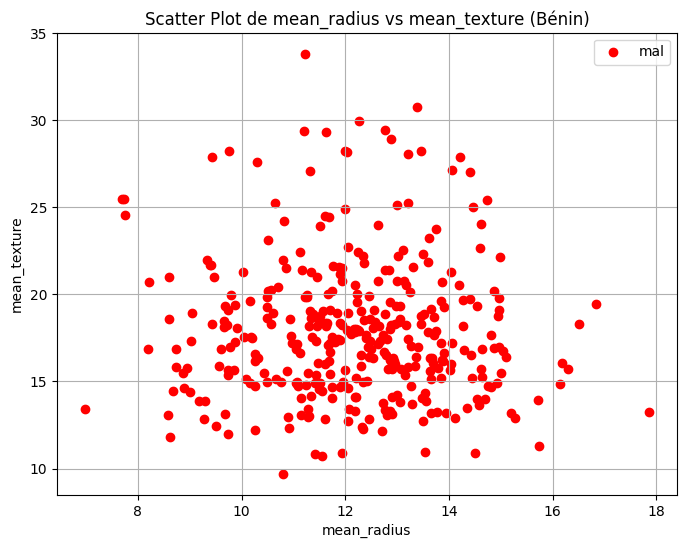

In [15]:
import matplotlib.pyplot as plt

# Filtrer les données où diagnosis est égal à 0 (bénin)
cas_mal = data[data['diagnosis'] == 1]

# Créez un scatter plot de mean_radius vs mean_texture pour les cas bénins
plt.figure(figsize=(8, 6))
plt.scatter(cas_mal['mean_radius'], cas_mal['mean_texture'], color='red', label='mal', marker='o')
plt.xlabel('mean_radius')
plt.ylabel('mean_texture')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin)')
plt.legend()
plt.grid()
plt.show()


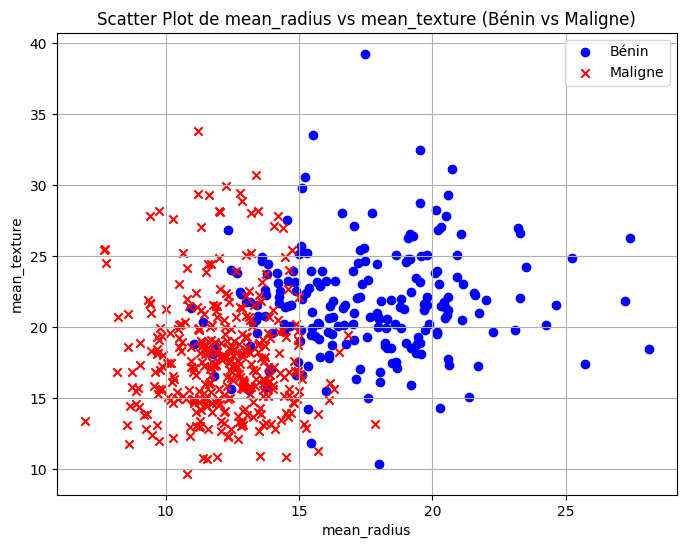

In [16]:
import matplotlib.pyplot as plt

# Filtrer les données pour les cas où diagnosis est égal à 0 (bénin)
cas_benins = data[data['diagnosis'] == 0]

# Filtrer les données pour les cas où diagnosis est égal à 1 (malin)
cas_malins = data[data['diagnosis'] == 1]

# Créez un scatter plot de mean_radius vs mean_texture pour les deux diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(cas_benins['mean_texture'], cas_benins['mean_texture'], color='blue', label='Bénin', marker='o')
plt.scatter(cas_malins['mean_texture'], cas_malins['mean_texture'], color='red', label='Maligne', marker='x')
plt.xlabel('mean_texture')
plt.ylabel('mean_texture')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin vs Maligne)')
plt.legend()
plt.grid()
plt.show()


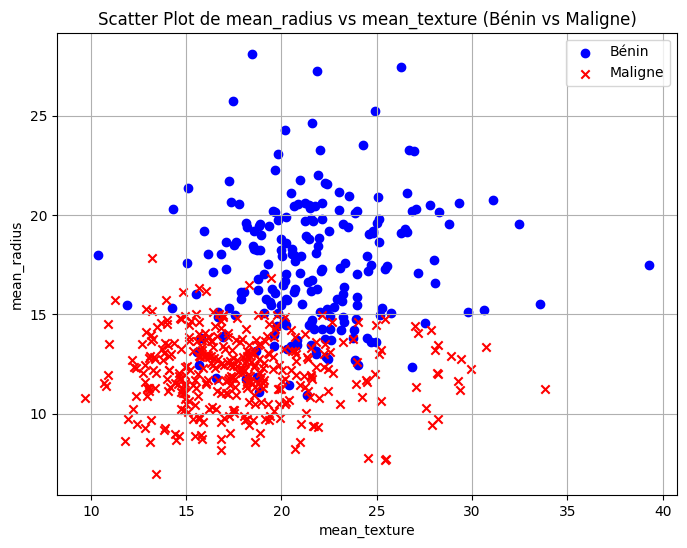

In [20]:
import matplotlib.pyplot as plt

# Filtrer les données pour les cas où diagnosis est égal à 0 (bénin)
cas_benins = data[data['diagnosis'] == 0]

# Filtrer les données pour les cas où diagnosis est égal à 1 (malin)
cas_malins = data[data['diagnosis'] == 1]

# Créez un scatter plot de mean_radius vs mean_texture pour les deux diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(cas_benins['mean_texture'], cas_benins['mean_radius'], color='blue', label='Bénin', marker='o')
plt.scatter(cas_malins['mean_texture'], cas_malins['mean_radius'], color='red', label='Maligne', marker='x')
plt.xlabel('mean_texture')
plt.ylabel('mean_radius')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin vs Maligne)')
plt.legend()
plt.grid()
plt.show()


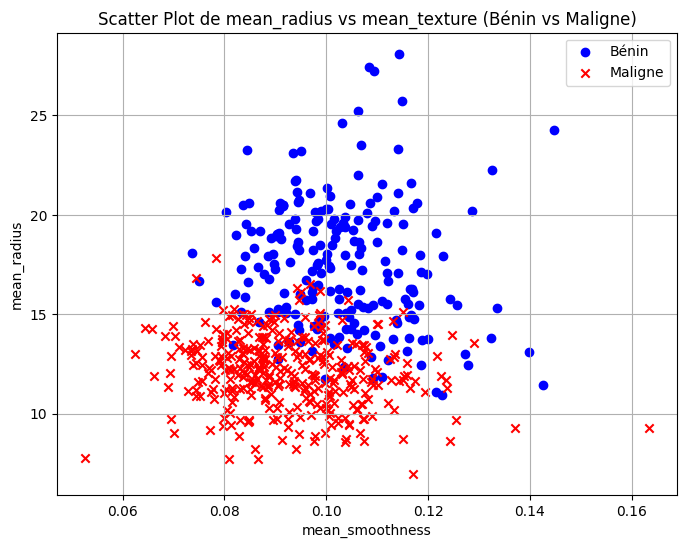

In [6]:
import matplotlib.pyplot as plt

# Filtrer les données pour les cas où diagnosis est égal à 0 (bénin)
cas_benins = data[data['diagnosis'] == 0]

# Filtrer les données pour les cas où diagnosis est égal à 1 (malin)
cas_malins = data[data['diagnosis'] == 1]

# Créez un scatter plot de mean_radius vs mean_texture pour les deux diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(cas_benins['mean_smoothness'], cas_benins['mean_radius'], color='blue', label='Bénin', marker='o')
plt.scatter(cas_malins['mean_smoothness'], cas_malins['mean_radius'], color='red', label='Maligne', marker='x')
plt.xlabel('mean_smoothness')
plt.ylabel('mean_radius')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin vs Maligne)')
plt.legend()
plt.grid()
plt.show()

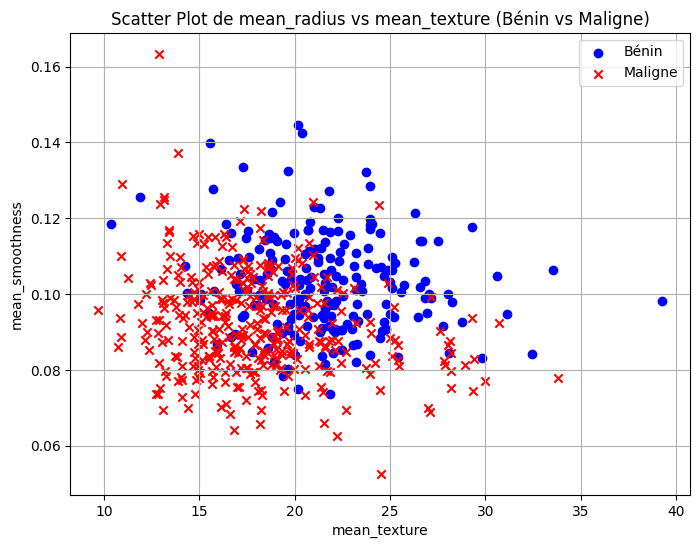

In [19]:
import matplotlib.pyplot as plt

# Filtrer les données pour les cas où diagnosis est égal à 0 (bénin)
cas_benins = data[data['diagnosis'] == 0]

# Filtrer les données pour les cas où diagnosis est égal à 1 (malin)
cas_malins = data[data['diagnosis'] == 1]

# Créez un scatter plot de mean_radius vs mean_texture pour les deux diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(cas_benins['mean_texture'], cas_benins['mean_smoothness'], color='blue', label='Bénin', marker='o')
plt.scatter(cas_malins['mean_texture'], cas_malins['mean_smoothness'], color='red', label='Maligne', marker='x')
plt.xlabel('mean_texture')
plt.ylabel('mean_smoothness')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin vs Maligne)')
plt.legend()
plt.grid()
plt.show()

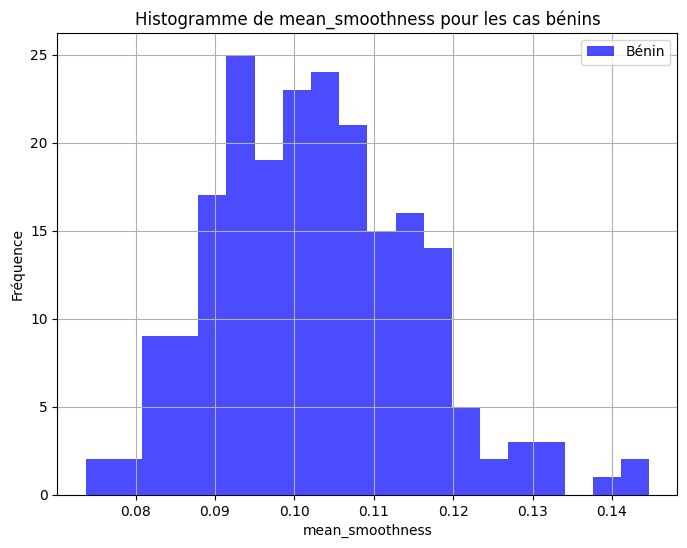

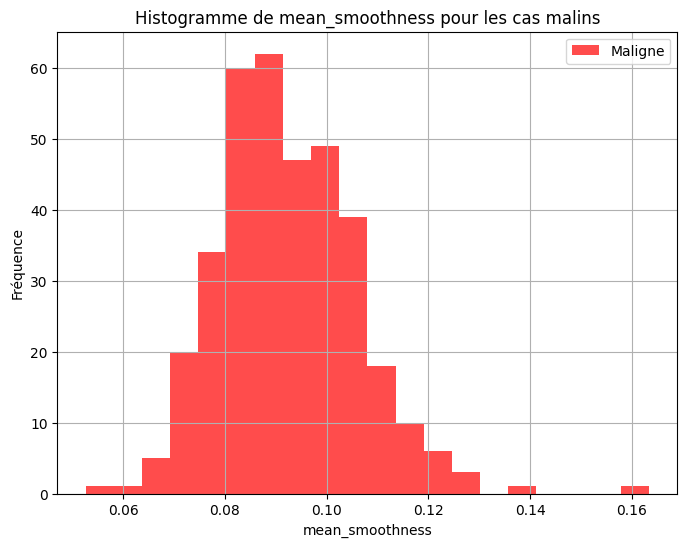

In [4]:
import matplotlib.pyplot as plt

# Séparez les données en fonction du diagnostic (0: bénin, 1: malin)
cas_benins = data[data['diagnosis'] == 0]
cas_malins = data[data['diagnosis'] == 1]

# Créez un histogramme pour les cas bénins
plt.figure(figsize=(8, 6))
plt.hist(cas_benins['mean_smoothness'], bins=20, color='blue', alpha=0.7, label='Bénin')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas bénins')
plt.legend()
plt.grid()
plt.show()

# Créez un histogramme pour les cas malins
plt.figure(figsize=(8, 6))
plt.hist(cas_malins['mean_smoothness'], bins=20, color='red', alpha=0.7, label='Maligne')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas malins')
plt.legend()
plt.grid()
plt.show()



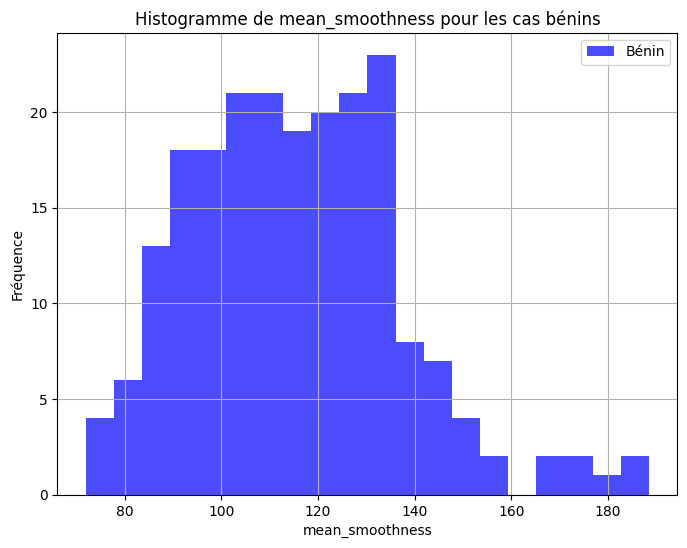

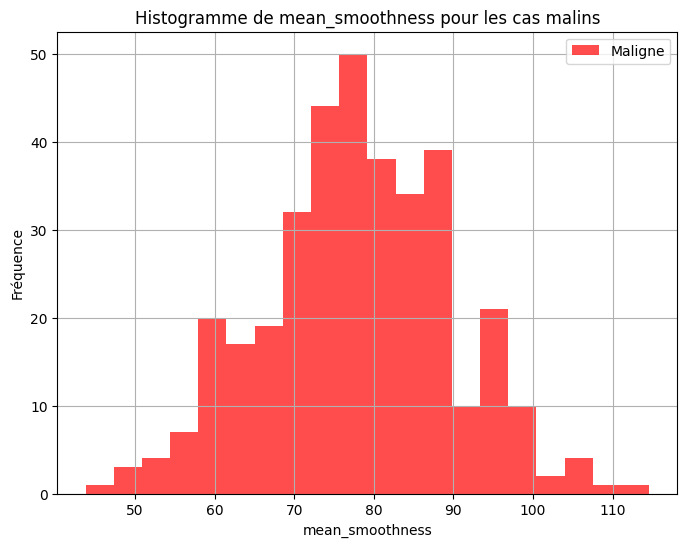

In [6]:
import matplotlib.pyplot as plt

# Séparez les données en fonction du diagnostic (0: bénin, 1: malin)
cas_benins = data[data['diagnosis'] == 0]
cas_malins = data[data['diagnosis'] == 1]

# Créez un histogramme pour les cas bénins
plt.figure(figsize=(8, 6))
plt.hist(cas_benins['mean_perimeter'], bins=20, color='blue', alpha=0.7, label='Bénin')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas bénins')
plt.legend()
plt.grid()
plt.show()

# Créez un histogramme pour les cas malins
plt.figure(figsize=(8, 6))
plt.hist(cas_malins['mean_perimeter'], bins=20, color='red', alpha=0.7, label='Maligne')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas malins')
plt.legend()
plt.grid()
plt.show()

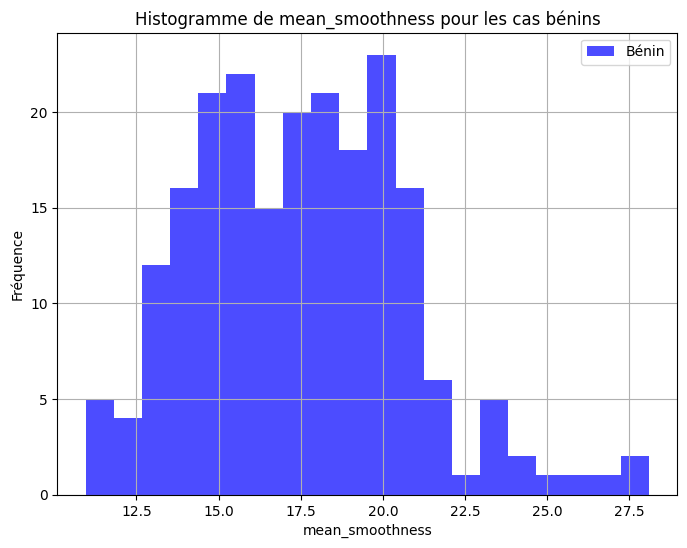

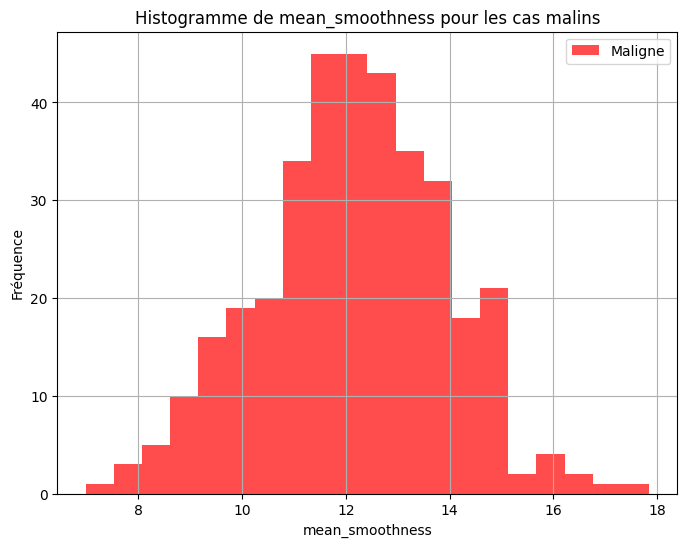

In [19]:
# Créez un histogramme pour les cas bénins
plt.figure(figsize=(8, 6))
plt.hist(cas_benins['mean_radius'], bins=20, color='blue', alpha=0.7, label='Bénin')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas bénins')
plt.legend()
plt.grid()
plt.show()

# Créez un histogramme pour les cas malins
plt.figure(figsize=(8, 6))
plt.hist(cas_malins['mean_radius'], bins=20, color='red', alpha=0.7, label='Maligne')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas malins')
plt.legend()
plt.grid()
plt.show()

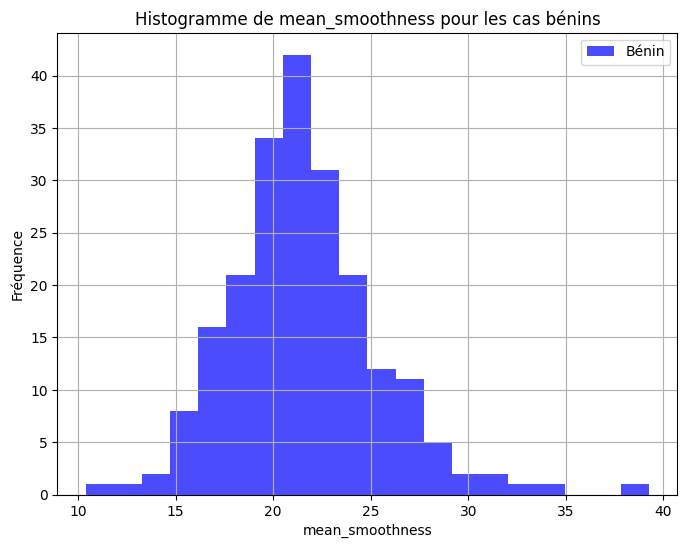

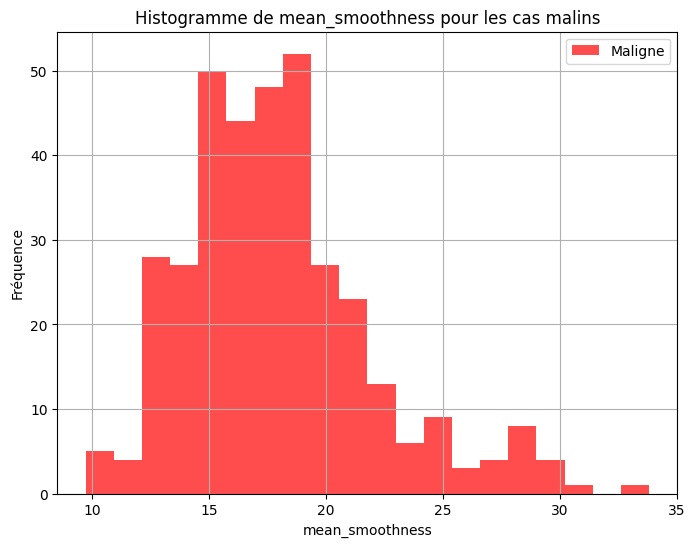

In [8]:
import matplotlib.pyplot as plt

# Séparez les données en fonction du diagnostic (0: bénin, 1: malin)
cas_benins = data[data['diagnosis'] == 0]
cas_malins = data[data['diagnosis'] == 1]

# Créez un histogramme pour les cas bénins
plt.figure(figsize=(8, 6))
plt.hist(cas_benins['mean_texture'], bins=20, color='blue', alpha=0.7, label='Bénin')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas bénins')
plt.legend()
plt.grid()
plt.show()

# Créez un histogramme pour les cas malins
plt.figure(figsize=(8, 6))
plt.hist(cas_malins['mean_texture'], bins=20, color='red', alpha=0.7, label='Maligne')
plt.xlabel('mean_smoothness')
plt.ylabel('Fréquence')
plt.title('Histogramme de mean_smoothness pour les cas malins')
plt.legend()
plt.grid()
plt.show()

Nombre de cas bénins qui satisfont les conditions : 69
Nombre de cas malins qui satisfont les conditions : 0


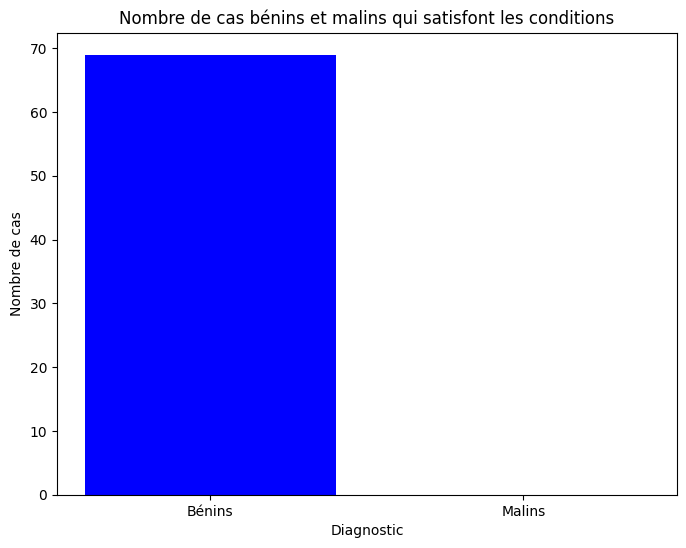

In [17]:
conditions = (data['mean_radius'] > 18) & (data['mean_perimeter'] > 100) & (data['mean_texture'] > 19)
cas_filtres = data[conditions]

# Compter le nombre de cas bénins (0) et malins (1) dans les cas filtrés
nombre_benins = cas_filtres[cas_filtres['diagnosis'] == 0]['diagnosis'].count()
nombre_malins = cas_filtres[cas_filtres['diagnosis'] == 1]['diagnosis'].count()

print("Nombre de cas bénins qui satisfont les conditions :", nombre_benins)
print("Nombre de cas malins qui satisfont les conditions :", nombre_malins)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.bar(['Bénins', 'Malins'], [nombre_benins, nombre_malins], color=['blue', 'red'])
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas bénins et malins qui satisfont les conditions')
plt.show()



Nombre de cas bénins qui satisfont les conditions : 0
Nombre de cas malins qui satisfont les conditions : 12


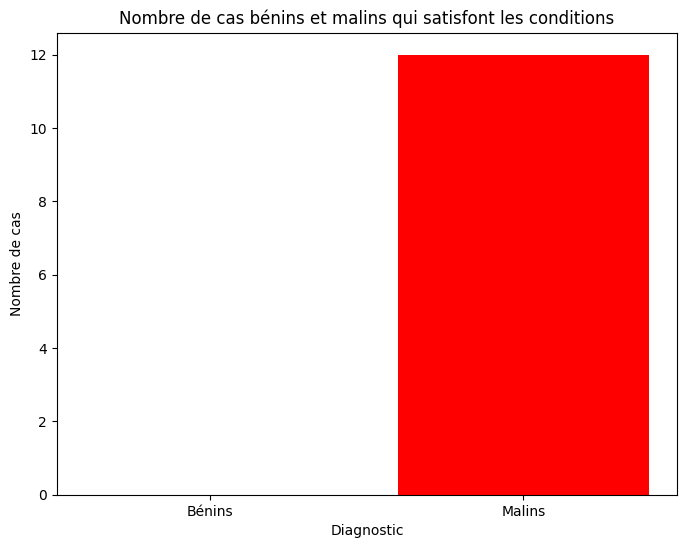

In [14]:
conditions = (data['mean_smoothness'] < 0.07) | (data['mean_smoothness'] > 0.15)
cas_filtres = data[conditions]

# Compter le nombre de cas bénins (0) et malins (1) dans les cas filtrés
nombre_benins = cas_filtres[cas_filtres['diagnosis'] == 0]['diagnosis'].count()
nombre_malins = cas_filtres[cas_filtres['diagnosis'] == 1]['diagnosis'].count()

print("Nombre de cas bénins qui satisfont les conditions :", nombre_benins)
print("Nombre de cas malins qui satisfont les conditions :", nombre_malins)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.bar(['Bénins', 'Malins'], [nombre_benins, nombre_malins], color=['blue', 'red'])
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas bénins et malins qui satisfont les conditions')
plt.show()



Nombre de cas bénins qui satisfont les conditions : 0
Nombre de cas malins qui satisfont les conditions : 47


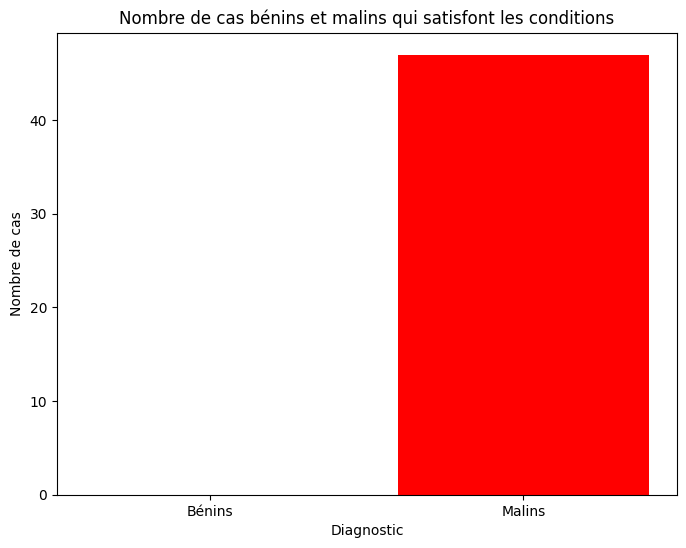

In [18]:
conditions = (data['mean_radius'] < 10)
cas_filtres = data[conditions]

# Compter le nombre de cas bénins (0) et malins (1) dans les cas filtrés
nombre_benins = cas_filtres[cas_filtres['diagnosis'] == 0]['diagnosis'].count()
nombre_malins = cas_filtres[cas_filtres['diagnosis'] == 1]['diagnosis'].count()

print("Nombre de cas bénins qui satisfont les conditions :", nombre_benins)
print("Nombre de cas malins qui satisfont les conditions :", nombre_malins)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.bar(['Bénins', 'Malins'], [nombre_benins, nombre_malins], color=['blue', 'red'])
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas bénins et malins qui satisfont les conditions')
plt.show()


Nombre de cas bénins qui satisfont les conditions : 43
Nombre de cas malins qui satisfont les conditions : 334


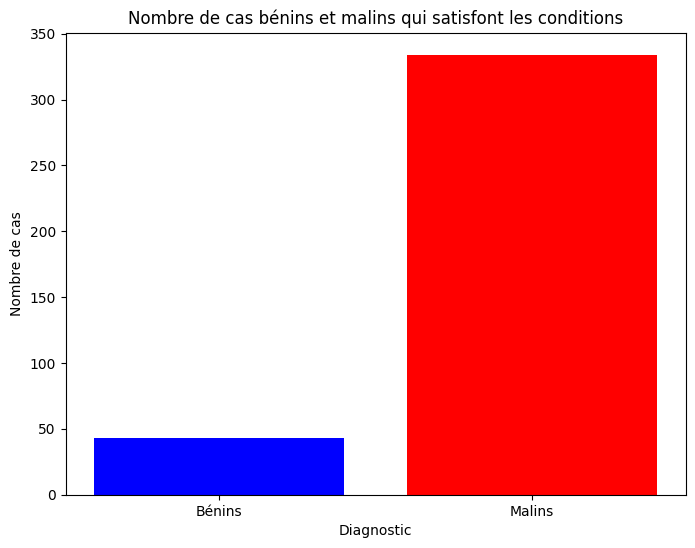

In [24]:
conditions = (data['mean_radius'] < 15 )& (data['mean_smoothness'] < 0.12 )
cas_filtres = data[conditions]

# Compter le nombre de cas bénins (0) et malins (1) dans les cas filtrés
nombre_benins = cas_filtres[cas_filtres['diagnosis'] == 0]['diagnosis'].count()
nombre_malins = cas_filtres[cas_filtres['diagnosis'] == 1]['diagnosis'].count()

print("Nombre de cas bénins qui satisfont les conditions :", nombre_benins)
print("Nombre de cas malins qui satisfont les conditions :", nombre_malins)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.bar(['Bénins', 'Malins'], [nombre_benins, nombre_malins], color=['blue', 'red'])
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas bénins et malins qui satisfont les conditions')
plt.show()


Nombre de cas bénins qui satisfont les conditions : 37
Nombre de cas malins qui satisfont les conditions : 308


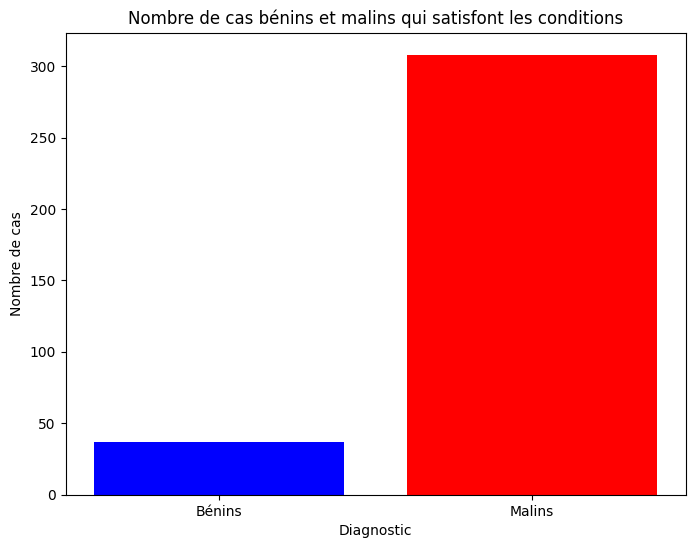

In [28]:
conditions = (data['mean_radius'] < 15 )& (data['mean_texture'] < 23)& (data['mean_texture'] > 9)
cas_filtres = data[conditions]

# Compter le nombre de cas bénins (0) et malins (1) dans les cas filtrés
nombre_benins = cas_filtres[cas_filtres['diagnosis'] == 0]['diagnosis'].count()
nombre_malins = cas_filtres[cas_filtres['diagnosis'] == 1]['diagnosis'].count()

print("Nombre de cas bénins qui satisfont les conditions :", nombre_benins)
print("Nombre de cas malins qui satisfont les conditions :", nombre_malins)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.bar(['Bénins', 'Malins'], [nombre_benins, nombre_malins], color=['blue', 'red'])
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas bénins et malins qui satisfont les conditions')
plt.show()


Nombre de cas bénins qui satisfont les conditions : 138
Nombre de cas malins qui satisfont les conditions : 2


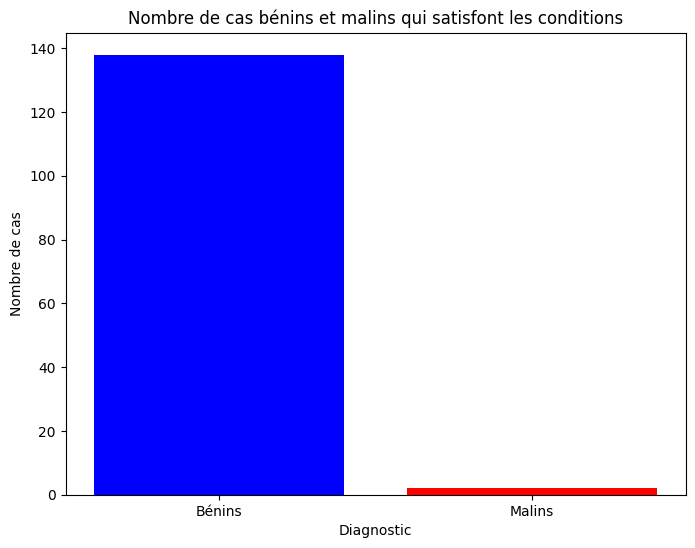

In [27]:
conditions = (data['mean_radius'] > 15 )& (data['mean_texture'] > 18)
cas_filtres = data[conditions]

# Compter le nombre de cas bénins (0) et malins (1) dans les cas filtrés
nombre_benins = cas_filtres[cas_filtres['diagnosis'] == 0]['diagnosis'].count()
nombre_malins = cas_filtres[cas_filtres['diagnosis'] == 1]['diagnosis'].count()

print("Nombre de cas bénins qui satisfont les conditions :", nombre_benins)
print("Nombre de cas malins qui satisfont les conditions :", nombre_malins)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.bar(['Bénins', 'Malins'], [nombre_benins, nombre_malins], color=['blue', 'red'])
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas bénins et malins qui satisfont les conditions')
plt.show()


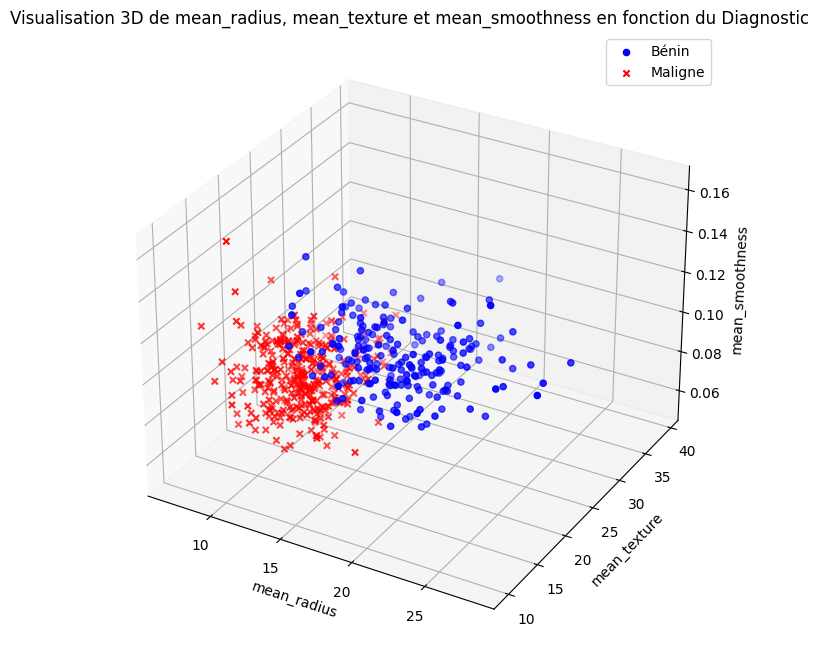

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créez une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Séparez les données en fonction du diagnostic (0: bénin, 1: malin)
cas_benins = data[data['diagnosis'] == 0]
cas_malins = data[data['diagnosis'] == 1]

# Affichez les caractéristiques en 3D
ax.scatter(cas_benins['mean_radius'], cas_benins['mean_texture'], cas_benins['mean_smoothness'], c='blue', label='Bénin', marker='o')
ax.scatter(cas_malins['mean_radius'], cas_malins['mean_texture'], cas_malins['mean_smoothness'], c='red', label='Maligne', marker='x')

ax.set_xlabel('mean_radius')
ax.set_ylabel('mean_texture')
ax.set_zlabel('mean_smoothness')
ax.set_title('Visualisation 3D de mean_radius, mean_texture et mean_smoothness en fonction du Diagnostic')

plt.legend()
plt.show()


In [ ]:
cas_benins = data[data['diagnosis'] == 0]

# Filtrer les données pour les cas où diagnosis est égal à 1 (malin)
cas_malins = data[data['diagnosis'] == 1]

# Créez un scatter plot de mean_radius vs mean_texture pour les deux diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(cas_benins['mean_texture'], cas_benins['mean_smoothness'], color='blue', label='Bénin', marker='o')
plt.scatter(cas_malins['mean_texture'], cas_malins['mean_smoothness'], color='red', label='Maligne', marker='x')
plt.xlabel('mean_texture')
plt.ylabel('mean_smoothness')
plt.title('Scatter Plot de mean_radius vs mean_texture (Bénin vs Maligne)')
plt.legend()
plt.grid()
plt.show()

In [53]:

cas2 = data[(data['mean_radius'] <18) & (data['diagnosis'] == 1) ]
cas2.head(40)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1
48,12.050,14.63,78.04,449.3,0.10310,1
49,13.490,22.30,86.91,561.0,0.08752,1
50,11.760,21.60,74.72,427.9,0.08637,1
51,13.640,16.34,87.21,571.8,0.07685,1
52,11.940,18.24,75.71,437.6,0.08261,1


In [27]:
cas_malignes.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1
48,12.050,14.63,78.04,449.3,0.10310,1
49,13.490,22.30,86.91,561.0,0.08752,1
50,11.760,21.60,74.72,427.9,0.08637,1
51,13.640,16.34,87.21,571.8,0.07685,1
52,11.940,18.24,75.71,437.6,0.08261,1


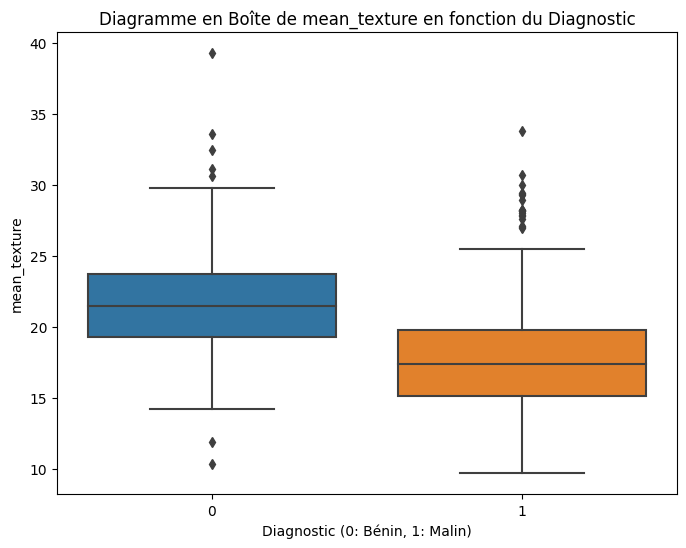

In [26]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='mean_texture', data=data)
plt.xlabel('Diagnostic (0: Bénin, 1: Malin)')
plt.ylabel('mean_texture')
plt.title('Diagramme en Boîte de mean_texture en fonction du Diagnostic')
plt.show()
